## Import Package and authenrize

In [0]:
# run this for anthentic
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# for export csv files
from google.colab import files
# for data science
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings; warnings.filterwarnings(action='once')
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

%matplotlib inline

In [62]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
#for file1 in file_list:
#  print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))


/usr/local/lib/python3.6/dist-packages/google/colab/auth.py:141: ResourceWarning: unclosed <ssl.SSLSocket fd=85, family=AddressFamily.AF_INET, type=2049, proto=6, laddr=('172.28.0.2', 44868), raddr=('64.233.188.95', 443)>
  if _check_adc():


## Get path


In [63]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s, mimeType: %s' % (file1['title'], file1['id'], file1["mimeType"]))

title: System Security Plan-Draft Report, id: 1B4UpBfsiosKmAkyP-kMV49hTVYKWaot-9lTq-0VPf_A, mimeType: application/vnd.google-apps.document
title: Copy of dataset_construction.ipynb, id: 1C7ZLcZBl-CBAvi7nhSu4PvpHL_WwMimx, mimeType: application/octet-stream
title: Colab Notebooks, id: 1vObJBGg2cEuBMaIBfyE8-NdJSrK08P2c, mimeType: application/vnd.google-apps.folder
title: Risk Management Plan of General Motors, id: 10Zib0GVJ2N4873PpNXcZ3apDOIS7wA2nwUeQfRZqTes, mimeType: application/vnd.google-apps.document
title: Autonomous Car Qualitative Risk Analysis, id: 1yvVzcmag7Hl7X2Ckx_2aSXZtr6ISy9n9hxfO1S97e8U, mimeType: application/vnd.google-apps.spreadsheet
title: Risk Register, id: 1IDO2lx9LNTYp9M43w2UjRY_V3D0X78Y8pDOxRrObNjg, mimeType: application/vnd.google-apps.spreadsheet
title: Untitled spreadsheet, id: 1mzDHW3180KZmei4Vg21oeHw1rHqnBl6pjLJNRXVCSvU, mimeType: application/vnd.google-apps.spreadsheet
title: My 2019 footprint, id: 1k2Xl6dKDzAecNAZzNpmN-Iz0TbutDBQa, mimeType: application/vnd.g

In [64]:
root_file = drive.ListFile({'q': "'1vObJBGg2cEuBMaIBfyE8-NdJSrK08P2c' in parents"}).GetList()
for _file in root_file:
  print('title: %s, id: %s, mimeType: %s' % (_file['title'], _file['id'], _file["mimeType"]))

title: “576_project_eda.ipynb”的副本, id: 1EldRX-3GWI2mr_FndLVS_lmC91SE9Pqb, mimeType: application/vnd.google.colaboratory
title: “576_project.ipynb”的副本, id: 1k2tgNx6h-L9IF98wr54e8UnayRZw3H_w, mimeType: application/vnd.google.colaboratory
title: Merged_FlightsWeather.csv, id: 1q4wcF1YSc-DSG8-e2jPRKeAjiklGvpJE, mimeType: text/csv
title: “576_project_datacleaning_model_(FinalVersion).ipynb”的副本, id: 1PYS57GGgCNjkAuVOsWFFEBi3IvkkGQPP, mimeType: application/vnd.google.colaboratory
title: combined_data_without_arrival.csv, id: 17ELjX7ZfRajcu6GUKPgib_rx9B8eBqUf, mimeType: text/csv
title: combined_data_with_arrival.csv, id: 1iOY689O0sAl_CmlO0XZwRxfAo1fP8DYG, mimeType: text/csv
title: weather_flights_washU.csv, id: 1EMDu3GYlBYj-4y0DEiTUJwTaL1PFFExx, mimeType: text/csv
title: flights_2014_wash_U.csv, id: 1TulfTBO7P6inJpJWd0J7UMOSZ7Tl7U_D, mimeType: text/csv


## Load flight dataframe

In [65]:
downloaded2 = drive.CreateFile({'id':'1TulfTBO7P6inJpJWd0J7UMOSZ7Tl7U_D'}) 
downloaded2.GetContentFile('flights_2014_wash_U.csv')  
df_flight = pd.read_csv('flights_2014_wash_U.csv')

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/common.py:216: ResourceWarning: unclosed <ssl.SSLSocket fd=89, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47702), raddr=('74.125.203.95', 443)>
  return lambda tipo: (


In [66]:
df_flight.shape

(3822830, 23)

In [67]:
df_flight.head(10)

,year,month,day,dayofweek,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,IATA,cancelled,distance,air_time,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,hour,minute
0,2014,1,1,3,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,0,1542,194.0,70.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2014,1,1,3,1.0,109.0,246.0,106.0,UA,N829UA,766,SFO,PHX,0,651,82.0,106.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2014,1,1,3,2.0,262.0,331.0,256.0,AA,N3JBAA,154,ORD,MCO,0,1005,133.0,25.0,0.0,0.0,0.0,231.0,0.0,2.0
3,2014,1,1,3,2.0,182.0,215.0,160.0,AA,N3KGAA,1377,ORD,SEA,0,1721,234.0,23.0,0.0,0.0,0.0,137.0,0.0,2.0
4,2014,1,1,3,2.0,32.0,630.0,60.0,AA,N3ECAA,1522,SFO,ORD,0,1846,220.0,32.0,0.0,28.0,0.0,0.0,0.0,2.0
5,2014,1,1,3,2.0,7.0,753.0,3.0,AS,N559AS,898,HNL,BLI,0,2715,330.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0
6,2014,1,1,3,2.0,37.0,335.0,32.0,B6,N586JB,729,MCO,BQN,0,1129,135.0,14.0,0.0,0.0,0.0,18.0,0.0,2.0
7,2014,1,1,3,2.0,107.0,243.0,148.0,MQ,N827MQ,3681,ORD,DAY,0,240,40.0,0.0,107.0,41.0,0.0,0.0,0.0,2.0
8,2014,1,1,3,2.0,7.0,20.0,-3.0,US,N179UW,844,PHX,LAX,0,370,57.0,NaN,NaN,NaN,NaN,NaN,0.0,2.0
9,2014,1,1,3,3.0,21.0,627.0,8.0,B6,N621JB,602,PHX,BOS,0,2300,245.0,NaN,NaN,NaN,NaN,NaN,0.0,3.0


## Pick one airport from Top30

In [0]:
def wea_delay_airport(origin):
  weatherdelay = df_flight[df_flight['origin'] == origin].weatherdelay
  return [round(len(weatherdelay[weatherdelay > 0]) / len(weatherdelay[weatherdelay]),4),
  len(weatherdelay[weatherdelay])]

In [71]:
# (weatherdelay>0) / (total flights)
for origin in df_flight.origin.unique():
  result = wea_delay_airport(origin)
  print('Total observations in ' + origin + ': ' + str(result[1]) + ', proportion of weather delay: ' + str(result[0]) )

Total observations in PDX: 53335, proportion of weather delay: 0.0046
Total observations in SFO: 166893, proportion of weather delay: 0.0056
Total observations in ORD: 287036, proportion of weather delay: 0.0293
Total observations in HNL: 46313, proportion of weather delay: 0.0007
Total observations in MCO: 110417, proportion of weather delay: 0.0201
Total observations in PHX: 160475, proportion of weather delay: 0.0033
Total observations in IAH: 174210, proportion of weather delay: 0.0113
Total observations in SEA: 108714, proportion of weather delay: 0.0047
Total observations in LAX: 221932, proportion of weather delay: 0.005
Total observations in DEN: 224205, proportion of weather delay: 0.0124
Total observations in CLT: 112243, proportion of weather delay: 0.01
Total observations in DFW: 278309, proportion of weather delay: 0.026
Total observations in MDW: 88501, proportion of weather delay: 0.0156
Total observations in STL: 52418, proportion of weather delay: 0.0147
Total observat

I would say ORD is a good choice, since it has large sample size (287036 observations) and highest portion of weather delays (0.0293).

I would like to do a little bit further investigation to vertify ORD is a good choice for our whole analysis.

In [72]:
df_flight['weatherdelay1'] = df_flight.apply(lambda x: 1 if x.weatherdelay > 0 else 0, axis=1)
# count all weather delays in each airport
df_flight.groupby('origin')['weatherdelay1'].sum()

origin
ATL    5657
BOS    1275
BWI     763
CLT    1124
DCA     893
DEN    2773
DFW    7249
DTW    1237
EWR    1347
FLL     826
HNL      31
IAD     787
IAH    1964
LAS     634
LAX    1108
LGA    1750
MCO    2224
MDW    1380
MIA    1436
MSP    1050
ORD    8424
PDX     247
PHL     896
PHX     522
SAN     358
SEA     508
SFO     931
SLC     397
STL     773
TPA     896
Name: weatherdelay1, dtype: int64

In [73]:
df_flight.groupby('origin')['weatherdelay1'].sum().max()

8424

We counted the number of weather delays in each airport, and ORD has the highest number of that (8424).

In [74]:
df_flight['dep_delay1'] = df_flight.apply(lambda x: 1 if x.dep_delay > 0 else 0, axis=1)
# count all departure delays in each airport
df_flight.groupby('origin')['dep_delay1'].sum()

origin
ATL    151151
BOS     37162
BWI     48153
CLT     41231
DCA     22575
DEN    114006
DFW    122163
DTW     35104
EWR     48825
FLL     27629
HNL     11702
IAD     26267
IAH     77598
LAS     64876
LAX     93228
LGA     35920
MCO     47778
MDW     53809
MIA     28048
MSP     34606
ORD    139669
PDX     16806
PHL     27473
PHX     69192
SAN     31714
SEA     39732
SFO     71325
SLC     30355
STL     24135
TPA     26021
Name: dep_delay1, dtype: int64

We counted the number of departure delays in each airport, and ORD has the second highest number of that (139669).

In [75]:
# proportion of weatherdelay - total departure delays in each airport
prop_weadelay_depart = df_flight.groupby('origin')['weatherdelay1'].sum()/ df_flight.groupby('origin')['dep_delay1'].sum()
prop_weadelay_depart

origin
ATL    0.037426
BOS    0.034309
BWI    0.015845
CLT    0.027261
DCA    0.039557
DEN    0.024323
DFW    0.059339
DTW    0.035238
EWR    0.027588
FLL    0.029896
HNL    0.002649
IAD    0.029962
IAH    0.025310
LAS    0.009772
LAX    0.011885
LGA    0.048719
MCO    0.046549
MDW    0.025646
MIA    0.051198
MSP    0.030342
ORD    0.060314
PDX    0.014697
PHL    0.032614
PHX    0.007544
SAN    0.011288
SEA    0.012786
SFO    0.013053
SLC    0.013079
STL    0.032028
TPA    0.034434
dtype: float64

In [76]:
prop_weadelay_depart.max()

0.060314028166593876

We calculated the proportion of weather delays and departure delays in each airport, and ORD has the highest number of that (0.60314)

## Pick the flights haven't been cancelled

In [0]:
df_flight_cancelled = df_flight[df_flight['cancelled'] == 1]

In [78]:
len(df_flight_cancelled)

76262

In [79]:
df_flight_cancelled[df_flight_cancelled['weatherdelay'] > 0].shape

(0, 25)

It means cancelled flights have no overlap with weather delays.

In [0]:
df_ORD = df_flight[df_flight['cancelled'] == 0]
df_ORD = df_ORD[df_ORD['origin'] == 'ORD']

In [81]:
df_ORD.shape

(273582, 25)

Only filtering out flights departing from ORD. Since cancelled flights have no overlap with weather delays. We remove observations belonging to cancelled flights. Finally, we have total 273582 observations.

## Load merged dataset

In [0]:
downloaded3 = drive.CreateFile({'id':'1q4wcF1YSc-DSG8-e2jPRKeAjiklGvpJE'}) 
downloaded3.GetContentFile('Merged_FlightsWeather.csv')  
df_origin = pd.read_csv('Merged_FlightsWeather.csv')

In [83]:
df_origin.shape

(273579, 38)

In our merged dataset, we have total 273579 observations because when merging flight data and weather data, we used schedule departure time (we calculated this by using actual departure time and departure delays) as the connection point, we removed 3 observations whose schedule departure time is actually in year 2013.

In [84]:
df_origin.head(10)

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/format.py:1787: ResourceWarning: unclosed <ssl.SSLSocket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 42244), raddr=('108.177.97.95', 443)>
  finite = [x for x in values if _is_number(x)]


,scheduled_dep,year,month,day,dayofweek,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,cancelled,distance,air_time,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,hour,minute,departure_time,delay,Unnamed: 0,IATA,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2014-01-01 05:00:00,2014,1,1,3,454.0,-6.0,754.0,7.0,US,N544UW,452,ORD,PHX,0,1440,204.0,NaN,NaN,NaN,NaN,NaN,4.0,54.0,2014-01-01 04:54:00,-1 days +23:54:00.000000000,165504,ORD,10.04,3.92,75.77,10.0,10.35702,11.918651,0.05,1026.5,1.75,2014-01-01 05:00:00
1,2014-01-01 05:09:00,2014,1,1,3,516.0,7.0,756.0,-3.0,UA,N73256,1500,ORD,IAH,0,925,146.0,NaN,NaN,NaN,NaN,NaN,5.0,16.0,2014-01-01 05:16:00,0 days 00:07:00.000000000,165504,ORD,10.04,3.92,75.77,10.0,10.35702,11.918651,0.05,1026.5,1.75,2014-01-01 05:00:00
2,2014-01-01 05:35:00,2014,1,1,3,532.0,-3.0,808.0,-12.0,UA,N36444,1199,ORD,IAD,0,589,75.0,NaN,NaN,NaN,NaN,NaN,5.0,32.0,2014-01-01 05:32:00,-1 days +23:57:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
3,2014-01-01 05:45:00,2014,1,1,3,612.0,27.0,818.0,15.0,UA,N24729,1681,ORD,CLE,0,315,47.0,0.0,15.0,0.0,0.0,0.0,6.0,12.0,2014-01-01 06:12:00,0 days 00:27:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
4,2014-01-01 05:50:00,2014,1,1,3,643.0,53.0,945.0,50.0,AA,N3KDAA,398,ORD,LGA,0,733,88.0,38.0,12.0,0.0,0.0,0.0,6.0,43.0,2014-01-01 06:43:00,0 days 00:53:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
5,2014-01-01 06:00:00,2014,1,1,3,556.0,-4.0,902.0,5.0,DL,N683DA,1477,ORD,ATL,0,606,83.0,NaN,NaN,NaN,NaN,NaN,5.0,56.0,2014-01-01 05:56:00,-1 days +23:56:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
6,2014-01-01 06:00:00,2014,1,1,3,609.0,9.0,903.0,1.0,US,N665AW,461,ORD,PHL,0,678,80.0,NaN,NaN,NaN,NaN,NaN,6.0,9.0,2014-01-01 06:09:00,0 days 00:09:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
7,2014-01-01 06:05:00,2014,1,1,3,622.0,17.0,953.0,8.0,UA,N11206,1530,ORD,MCO,0,1005,132.0,NaN,NaN,NaN,NaN,NaN,6.0,22.0,2014-01-01 06:22:00,0 days 00:17:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
8,2014-01-01 06:05:00,2014,1,1,3,653.0,48.0,909.0,49.0,MQ,N835MQ,2848,ORD,CMH,0,296,44.0,0.0,48.0,1.0,0.0,0.0,6.0,53.0,2014-01-01 06:53:00,0 days 00:48:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00
9,2014-01-01 06:09:00,2014,1,1,3,606.0,-3.0,946.0,-14.0,UA,N421UA,833,ORD,SRQ,0,1050,135.0,NaN,NaN,NaN,NaN,NaN,6.0,6.0,2014-01-01 06:06:00,-1 days +23:57:00.000000000,165505,ORD,10.40,3.20,72.12,10.0,10.35702,11.918651,0.00,NaN,7.00,2014-01-01 06:00:00


## EDA

In [85]:
df_origin.columns

Index(['scheduled_dep', 'year', 'month', 'day', 'dayofweek', 'dep_time',
       'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight',
       'origin', 'dest', 'cancelled', 'distance', 'air_time', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay',
       'hour', 'minute', 'departure_time', 'delay', 'Unnamed: 0', 'IATA',
       'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib', 'time_hour'],
      dtype='object')

In [86]:
df_origin.dtypes

scheduled_dep         object
year                   int64
month                  int64
day                    int64
dayofweek              int64
dep_time             float64
dep_delay            float64
arr_time             float64
arr_delay            float64
carrier               object
tailnum               object
flight                 int64
origin                object
dest                  object
cancelled              int64
distance               int64
air_time             float64
carrierdelay         float64
weatherdelay         float64
nasdelay             float64
securitydelay        float64
lateaircraftdelay    float64
hour                 float64
minute               float64
departure_time        object
delay                 object
Unnamed: 0             int64
IATA                  object
temp                 float64
dewp                 float64
humid                float64
wind_dir             float64
wind_speed           float64
wind_gust            float64
precip        

In [87]:
print(df_origin.isnull().sum())

scheduled_dep             0
year                      0
month                     0
day                       0
dayofweek                 0
dep_time                  0
dep_delay                 0
arr_time                238
arr_delay               739
carrier                   0
tailnum                   0
flight                    0
origin                    0
dest                      0
cancelled                 0
distance                  0
air_time                739
carrierdelay         188288
weatherdelay         188288
nasdelay             188288
securitydelay        188288
lateaircraftdelay    188288
hour                      0
minute                    0
departure_time            0
delay                     0
Unnamed: 0                0
IATA                      0
temp                    192
dewp                    192
humid                   192
wind_dir               4452
wind_speed              357
wind_gust               357
precip                    0
pressure            

In [0]:
df_origin = df_origin.fillna(value = {'weatherdelay': 0})

Rows have 'NaN' in 'weatherdelay' columns are considered as no weather delays, thus we fill these rows with value 0.

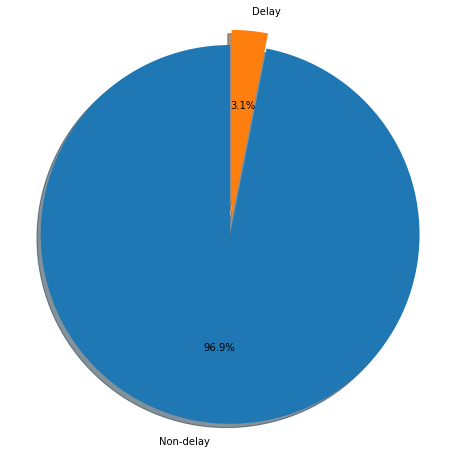

/usr/local/lib/python3.6/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=87, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47652), raddr=('74.125.203.95', 443)>
  gc.collect(1)
/usr/local/lib/python3.6/dist-packages/matplotlib/_pylab_helpers.py:76: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 47666), raddr=('74.125.203.95', 443)>
  gc.collect(1)


In [89]:
labels = 'Non-delay', 'Delay'
sizes = [len(df_origin[df_origin.weatherdelay == 0]), len(df_origin[df_origin.weatherdelay>0])]
explode = (0.08, 0)

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

We have a highly imbalanced dataset and we need figure out an approach to deal with it.

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1734: ResourceWarning: unclosed <ssl.SSLSocket fd=62, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 52410), raddr=('108.177.125.95', 443)>
  tmp.append(kw.pop(a))
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1734: ResourceWarning: unclosed <ssl.SSLSocket fd=59, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 52408), raddr=('108.177.125.95', 443)>
  tmp.append(kw.pop(a))
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1734: ResourceWarning: unclosed <ssl.SSLSocket fd=67, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('172.28.0.2', 46582), raddr=('74.125.23.95', 443)>
  tmp.append(kw.pop(a))
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1734: ResourceWarning: unclosed <ssl.SSLSocket fd=64, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM,

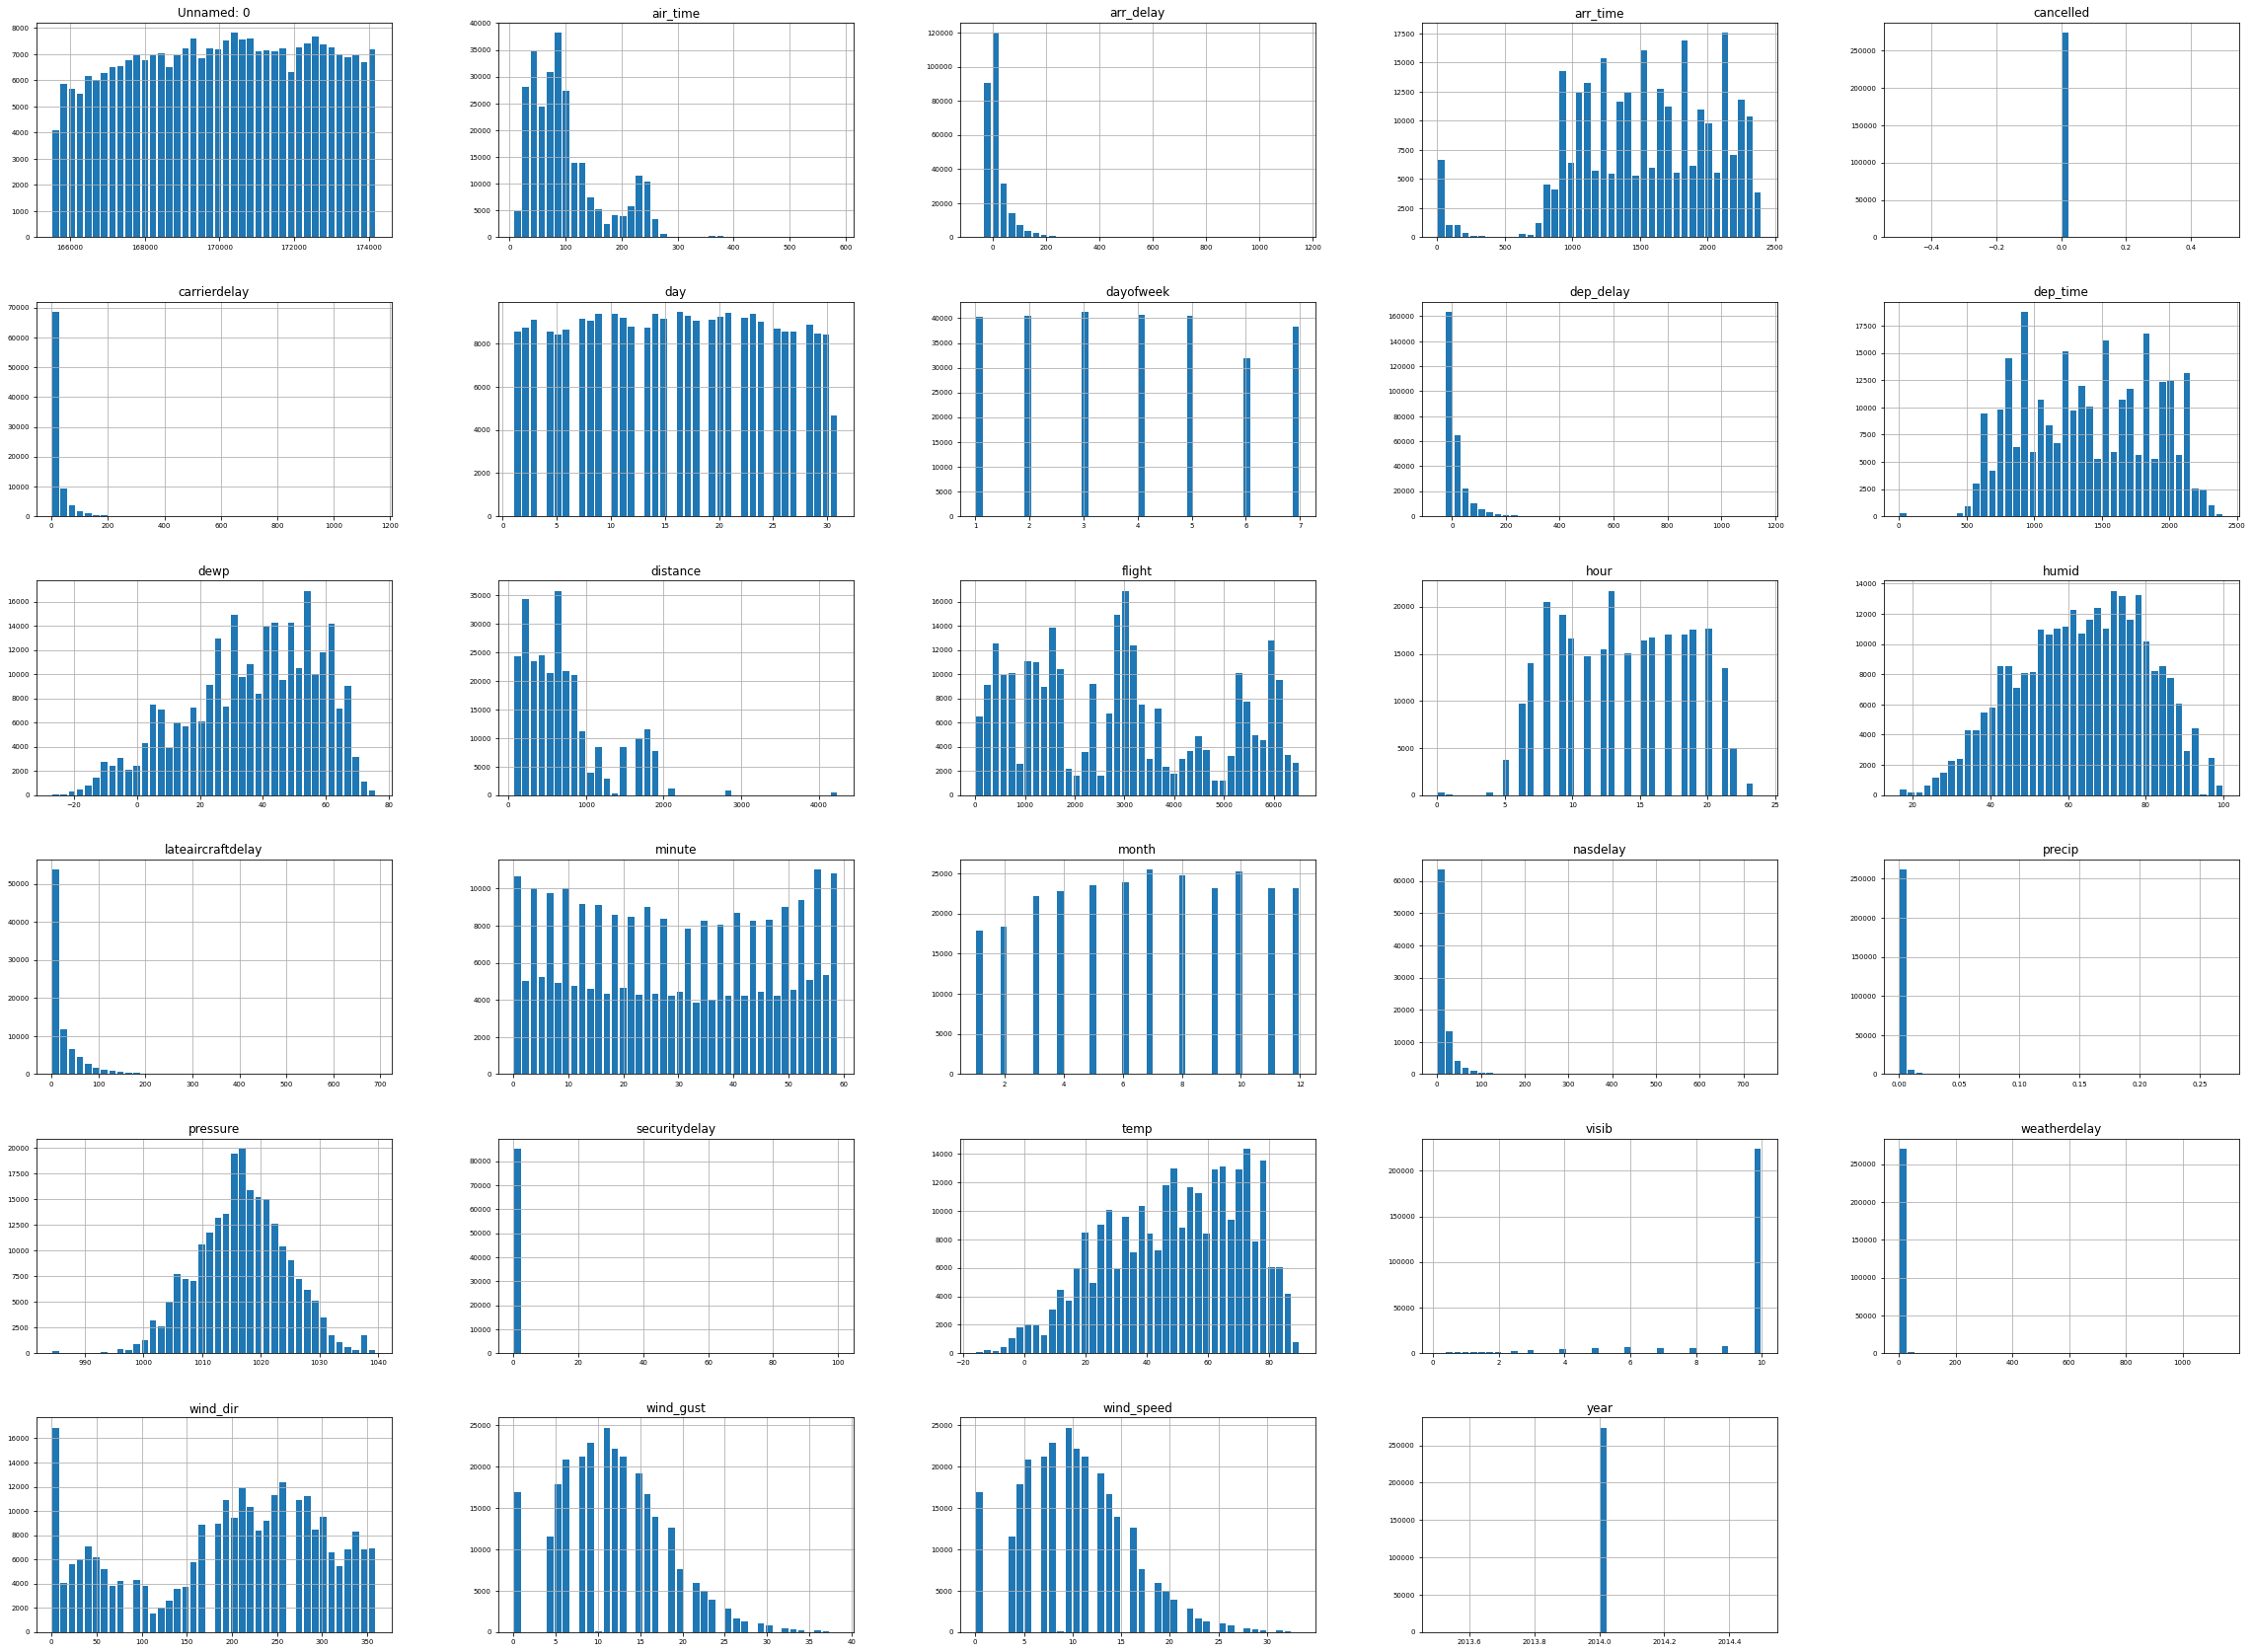

In [90]:
df_origin.hist(xlabelsize=7, ylabelsize=7, figsize=(40,30), bins=40, rwidth=0.8)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of Observations')

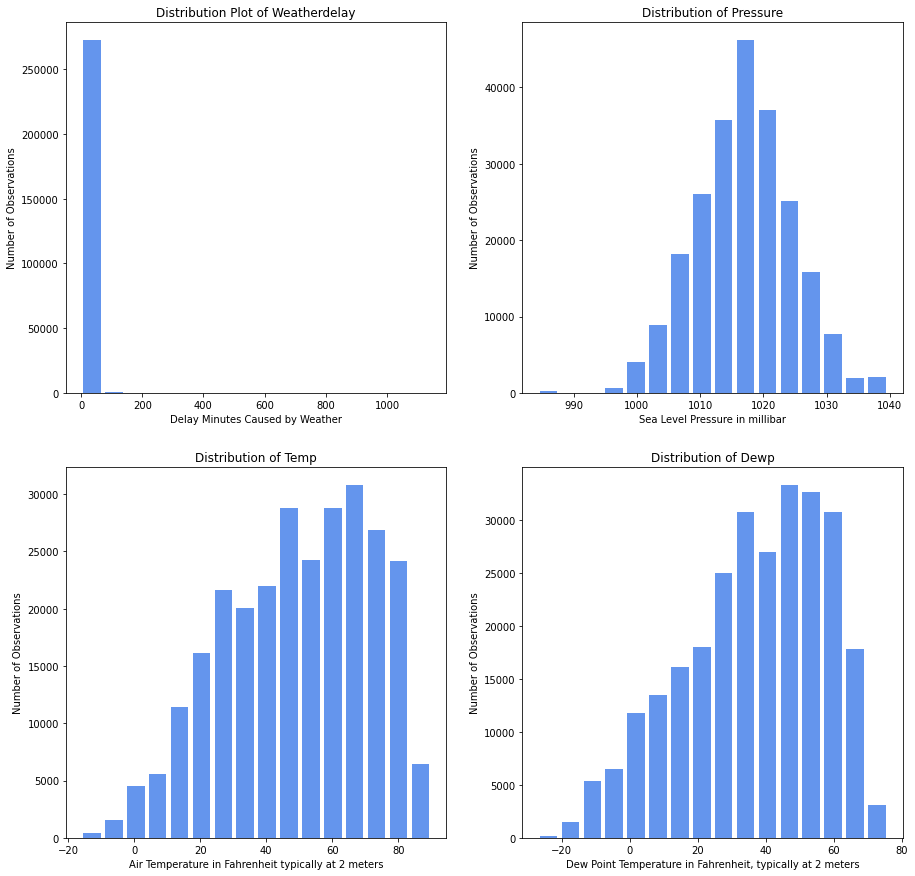

In [91]:
# large histogram
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df_origin['weatherdelay'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution Plot of Weatherdelay')
plt.xlabel('Delay Minutes Caused by Weather')
plt.ylabel('Number of Observations')

plt.subplot(222)
plt.hist(df_origin['pressure'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution of Pressure')
plt.xlabel('Sea Level Pressure in millibar')
plt.ylabel('Number of Observations')

plt.subplot(223)
plt.hist(df_origin['temp'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution of Temp')
plt.xlabel('Air Temperature in Fahrenheit typically at 2 meters')
plt.ylabel('Number of Observations')

plt.subplot(224)
plt.hist(df_origin['dewp'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution of Dewp')
plt.xlabel('Dew Point Temperature in Fahrenheit, typically at 2 meters')
plt.ylabel('Number of Observations')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Number of Observations')

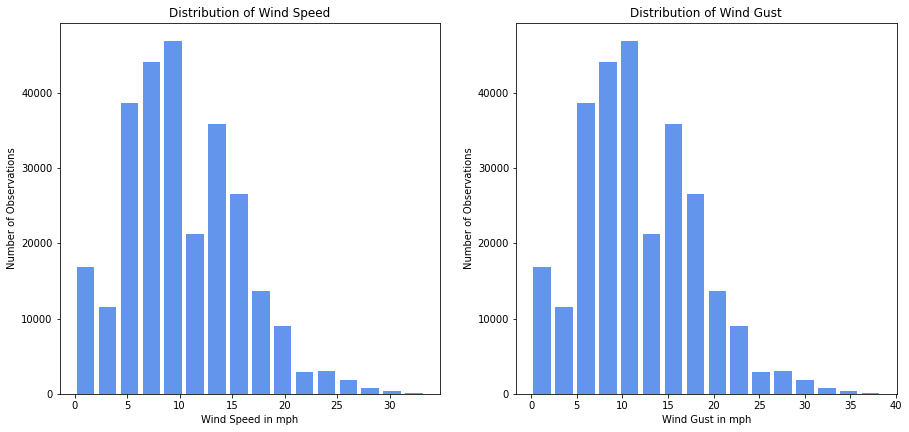

In [92]:
# large histogram
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.hist(df_origin['wind_speed'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed in mph')
plt.ylabel('Number of Observations')

plt.subplot(222)
plt.hist(df_origin['wind_gust'], bins = 16, rwidth=0.8, color='cornflowerblue')
plt.title('Distribution of Wind Gust')
plt.xlabel('Wind Gust in mph')
plt.ylabel('Number of Observations')

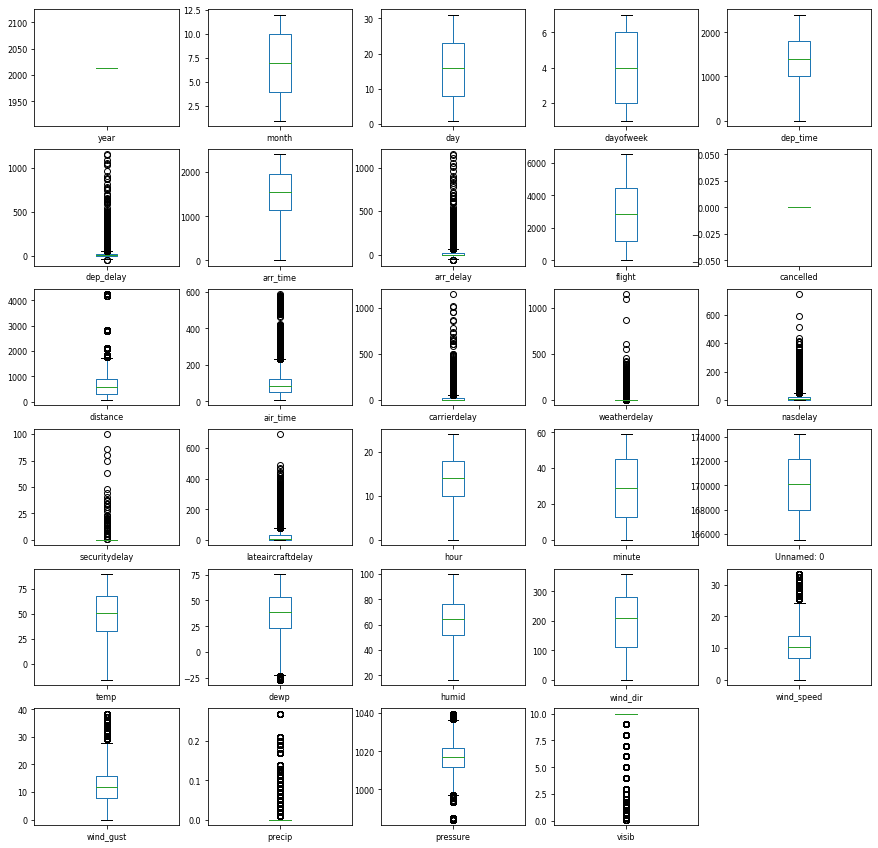

In [93]:
# boxplot
df_origin.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False, fontsize=8,figsize=(15,15))
plt.show()

In [0]:
df_model = df_origin[[ 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib', 'weatherdelay']]

select weather features and weatherdelay column

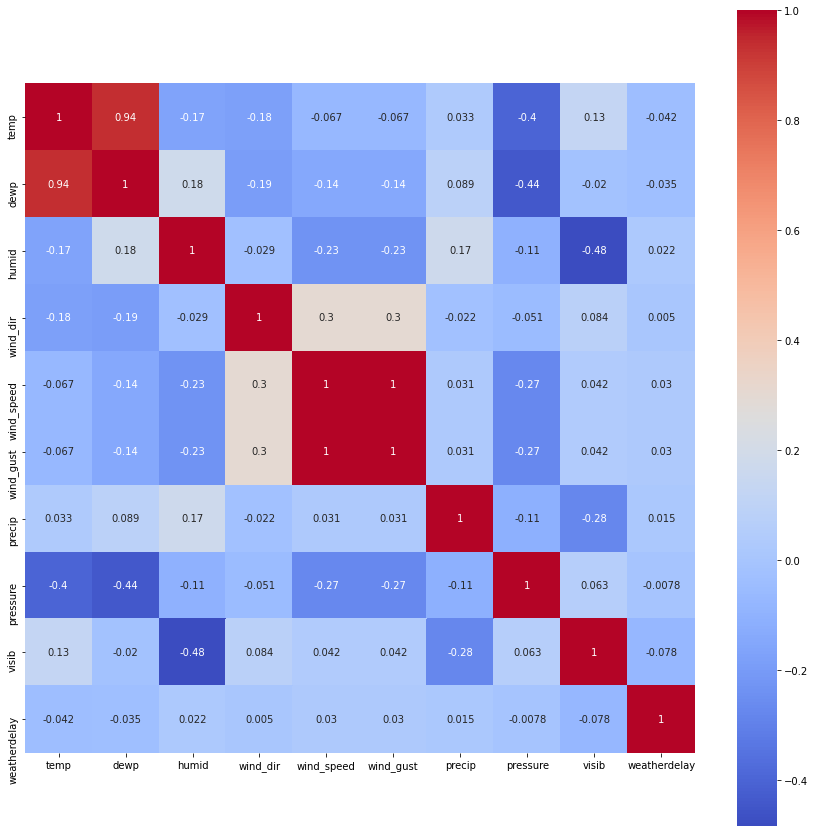

In [95]:
# plot correlation plot of one year dataset
dfData = df_model.corr().round(5)
plt.subplots(figsize=(15, 15)) 
sns.heatmap(dfData, vmax=1, annot=True, square=True, cmap='coolwarm')
plt.show()

In [96]:
dfData

,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,weatherdelay
temp,1.00000,0.93651,-0.16942,-0.17947,-0.06701,-0.06701,0.03300,-0.40209,0.12816,-0.04247
dewp,0.93651,1.00000,0.18055,-0.18840,-0.14371,-0.14371,0.08925,-0.44147,-0.01957,-0.03481
humid,-0.16942,0.18055,1.00000,-0.02862,-0.22925,-0.22925,0.17401,-0.10650,-0.48323,0.02162
wind_dir,-0.17947,-0.18840,-0.02862,1.00000,0.29963,0.29963,-0.02244,-0.05128,0.08423,0.00505
wind_speed,-0.06701,-0.14371,-0.22925,0.29963,1.00000,1.00000,0.03101,-0.27375,0.04192,0.03039
wind_gust,-0.06701,-0.14371,-0.22925,0.29963,1.00000,1.00000,0.03101,-0.27375,0.04192,0.03039
precip,0.03300,0.08925,0.17401,-0.02244,0.03101,0.03101,1.00000,-0.10907,-0.27755,0.01550
pressure,-0.40209,-0.44147,-0.10650,-0.05128,-0.27375,-0.27375,-0.10907,1.00000,0.06305,-0.00783
visib,0.12816,-0.01957,-0.48323,0.08423,0.04192,0.04192,-0.27755,0.06305,1.00000,-0.07758
weatherdelay,-0.04247,-0.03481,0.02162,0.00505,0.03039,0.03039,0.01550,-0.00783,-0.07758,1.00000


In [97]:
# count how many flights each month has
df_origin['month'].value_counts()

7     25442
10    25302
8     24783
6     23891
5     23504
12    23154
11    23150
9     23118
4     22776
3     22145
2     18416
1     17898
Name: month, dtype: int64

In [98]:
df_origin['month'].value_counts().sum()

273579

In [99]:
df_origin['weatherdelay1'] = df_origin.apply(lambda x: 1 if x.weatherdelay > 0 else 0, axis=1)
# count weather delays in ORD
df_origin.groupby('origin')['weatherdelay1'].sum()

origin
ORD    8423
Name: weatherdelay1, dtype: int64

In [100]:
df_origin['dep_delay1'] = df_origin.apply(lambda x: 1 if x.dep_delay > 0 else 0, axis=1)
# count departure delays in ORD
df_origin.groupby('origin')['dep_delay1'].sum()

origin
ORD    139292
Name: dep_delay1, dtype: int64

In [101]:
# count ORD's weather delays in each month
df_origin.groupby('month')['weatherdelay1'].sum()

month
1     2845
2     1005
3      454
4      552
5      404
6      550
7       82
8      644
9      145
10     124
11    1154
12     464
Name: weatherdelay1, dtype: int64

In [102]:
# count ORD's departure delays in each month
df_origin.groupby('month')['dep_delay1'].sum()

month
1     11911
2     10879
3     10937
4     10015
5     11946
6     13828
7     11695
8     13231
9      9848
10    13237
11    10954
12    10811
Name: dep_delay1, dtype: int64

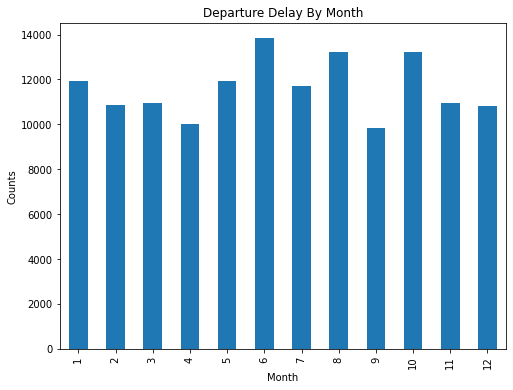

In [103]:
# Plot ORD's number of departure delays in each month by using bar graph
plt.figure(figsize=(8,6))
df_origin.groupby('month')['dep_delay1'].sum().plot(kind='bar')
plt.title('Departure Delay By Month')
plt.ylabel('Counts')
plt.xlabel('Month')
plt.show()

In [104]:
# calculate the ORD's proportion of weather delays of total flights in each month
month_prop = df_origin.groupby('month')['weatherdelay1'].sum()/df_origin['month'].value_counts()
month_prop

1     0.158956
2     0.054572
3     0.020501
4     0.024236
5     0.017189
6     0.023021
7     0.003223
8     0.025986
9     0.006272
10    0.004901
11    0.049849
12    0.020040
dtype: float64

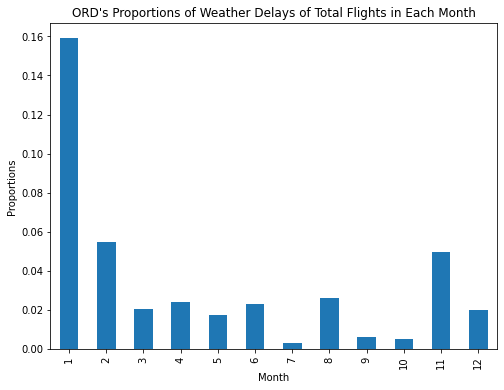

In [108]:
# plot the proportions of each month
plt.figure(figsize=(8,6))
month_prop.plot(kind='bar')
plt.title("ORD's Proportions of Weather Delays of Total Flights in Each Month")
plt.ylabel('Proportions')
plt.xlabel('Month')
plt.show()

In [106]:
# calculate ORD's proportion of weather delays of departure delays in each month
month_prop1 = df_origin.groupby('month')['weatherdelay1'].sum()/df_origin.groupby('month')['dep_delay1'].sum()
month_prop1

month
1     0.238855
2     0.092380
3     0.041510
4     0.055117
5     0.033819
6     0.039774
7     0.007012
8     0.048674
9     0.014724
10    0.009368
11    0.105350
12    0.042919
dtype: float64

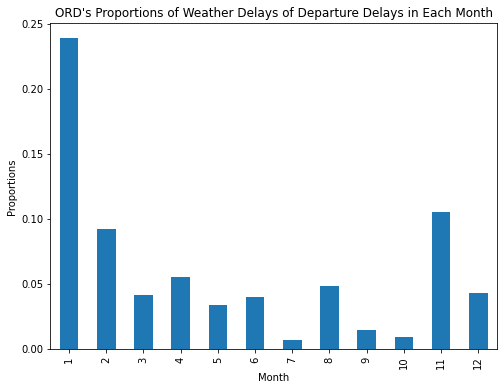

In [109]:
# plot ORD's proportions of weather delays of departure delays in each month
plt.figure(figsize=(8,6))
month_prop1.plot(kind='bar')
plt.title("ORD's Proportions of Weather Delays of Departure Delays in Each Month")
plt.ylabel('Proportions')
plt.xlabel('Month')
plt.show()

Text(0, 0.5, 'Air Temperature in Fahrenheit typically at 2 meters')

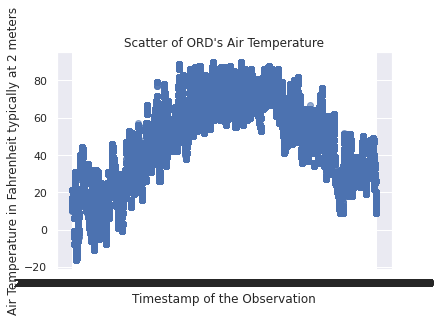

In [124]:
plt.scatter(df_origin['time_hour'], df_origin['temp'], alpha=0.6)
plt.title("Scatter of ORD's Air Temperature")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Air Temperature in Fahrenheit typically at 2 meters')
plt.show()

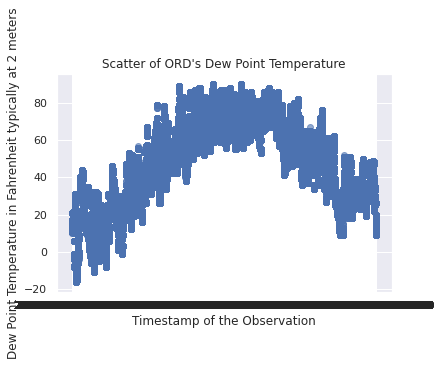

In [125]:
plt.scatter(df_origin['time_hour'], df_origin['temp'], alpha=0.6)
plt.title("Scatter of ORD's Dew Point Temperature")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Dew Point Temperature in Fahrenheit typically at 2 meters')
plt.show()

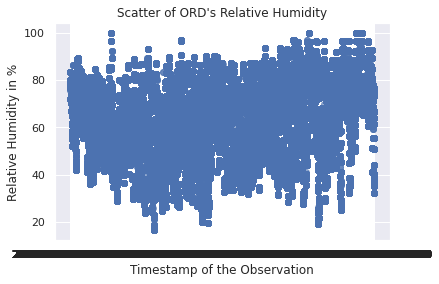

In [126]:
plt.scatter(df_origin['time_hour'], df_origin['humid'], alpha=0.6)
plt.title("Scatter of ORD's Relative Humidity")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Relative Humidity in %')
plt.show()

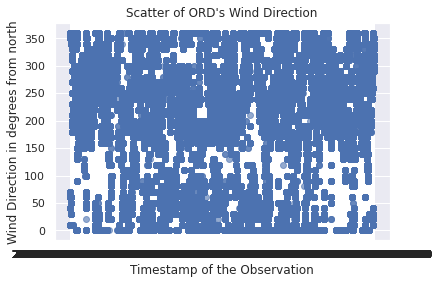

In [127]:
plt.scatter(df_origin['time_hour'], df_origin['wind_dir'], alpha=0.6)
plt.title("Scatter of ORD's Wind Direction")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Wind Direction in degrees from north')
plt.show()

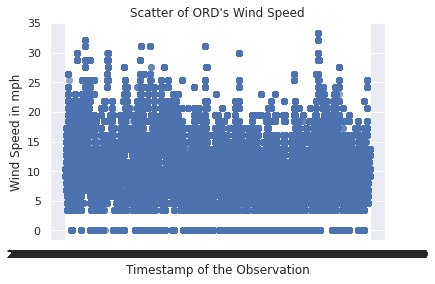

In [128]:
plt.scatter(df_origin['time_hour'], df_origin['wind_speed'], alpha=0.6)
plt.title("Scatter of ORD's Wind Speed")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Wind Speed in mph')
plt.show()

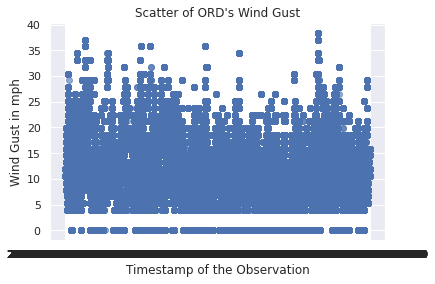

In [129]:
plt.scatter(df_origin['time_hour'], df_origin['wind_gust'], alpha=0.6)
plt.title("Scatter of ORD's Wind Gust")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Wind Gust in mph')
plt.show()

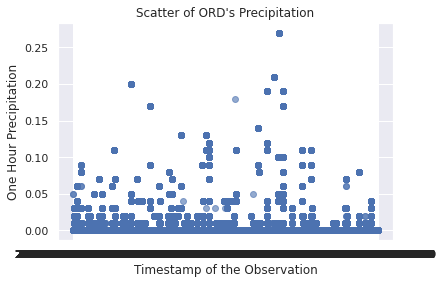

In [130]:
plt.scatter(df_origin['time_hour'], df_origin['precip'], alpha=0.6)
plt.title("Scatter of ORD's Precipitation")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('One Hour Precipitation')
plt.show()

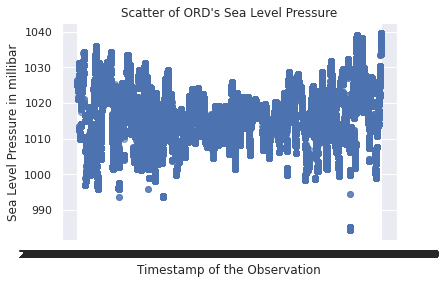

In [131]:
plt.scatter(df_origin['time_hour'], df_origin['pressure'], alpha=0.6)
plt.title("Scatter of ORD's Sea Level Pressure")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Sea Level Pressure in millibar')
plt.show()

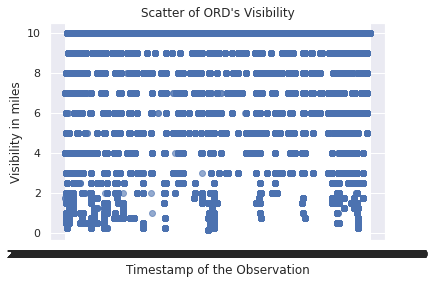

In [132]:
plt.scatter(df_origin['time_hour'], df_origin['visib'], alpha=0.6)
plt.title("Scatter of ORD's Visibility")
plt.xlabel('Timestamp of the Observation')
plt.ylabel('Visibility in miles')
plt.show()

In [113]:
# count weather delays in each carrier
df_origin.groupby('carrier')['weatherdelay1'].sum()

carrier
AA    2059
AS      32
B6      29
DL     242
EV     348
F9       2
MQ    3795
OO     366
UA    1298
US     143
VX     109
Name: weatherdelay1, dtype: int64

In [114]:
df_origin['carrier'].value_counts()

MQ    65889
UA    56605
EV    48235
AA    48022
OO    35219
US     7158
DL     6418
B6     2296
AS     1712
VX     1597
F9      428
Name: carrier, dtype: int64

In [115]:
# calculate the proportion of weather delays of total flights in each carrier
carrier_prop = df_origin.groupby('carrier')['weatherdelay1'].sum()/df_origin['carrier'].value_counts()
carrier_prop

AA    0.042876
AS    0.018692
B6    0.012631
DL    0.037706
EV    0.007215
F9    0.004673
MQ    0.057597
OO    0.010392
UA    0.022931
US    0.019978
VX    0.068253
dtype: float64

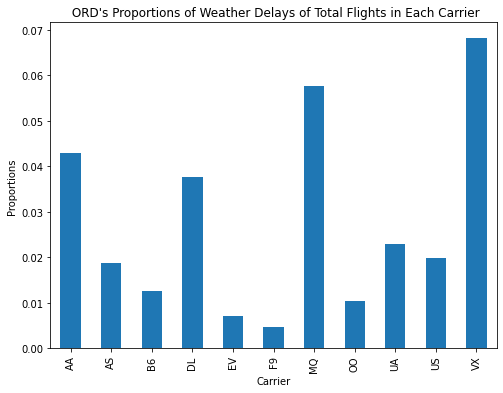

In [117]:
# plot the proportion of weather delays of total flights in each carrier
plt.figure(figsize=(8,6))
carrier_prop.plot(kind='bar')
plt.title(" ORD's Proportions of Weather Delays of Total Flights in Each Carrier")
plt.ylabel('Proportions')
plt.xlabel('Carrier')
plt.show()

In [118]:
df_origin.groupby('carrier')['dep_delay1'].sum()

carrier
AA    22256
AS      668
B6      893
DL     2765
EV    25016
F9      230
MQ    30337
OO    18207
UA    36071
US     2162
VX      687
Name: dep_delay1, dtype: int64

In [119]:
# calculate the proportion of weather delays of depature delays in each carrier
carrier_prop1 = df_origin.groupby('carrier')['weatherdelay1'].sum()/df_origin.groupby('carrier')['dep_delay1'].sum()
carrier_prop1

carrier
AA    0.092514
AS    0.047904
B6    0.032475
DL    0.087523
EV    0.013911
F9    0.008696
MQ    0.125095
OO    0.020102
UA    0.035985
US    0.066142
VX    0.158661
dtype: float64

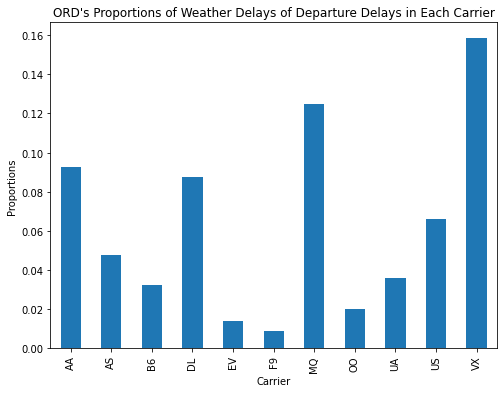

In [120]:
# plot the proportion of weather delays of departure delays in each carrier
plt.figure(figsize=(8,6))
carrier_prop1.plot(kind='bar')
plt.title("ORD's Proportions of Weather Delays of Departure Delays in Each Carrier")
plt.ylabel('Proportions')
plt.xlabel('Carrier')
plt.show()

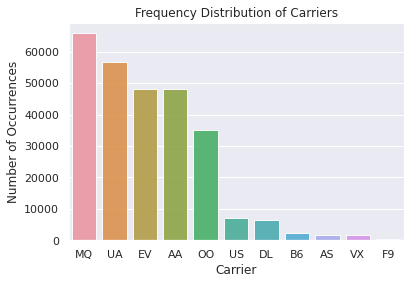

In [121]:
carrier_count = df_origin['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

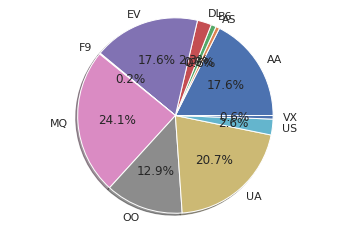

In [122]:
labels = df_origin['carrier'].astype('category').cat.categories.tolist()
counts = df_origin['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

